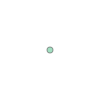

In [3]:
from cartes.osm import Overpass, Nominatim
Nominatim.search("瀬戸内海")

In [6]:
import logging

logging.getLogger().setLevel(logging.INFO)

<GeoAxesSubplot:>

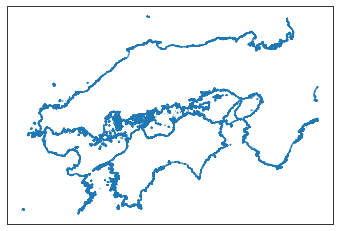

In [11]:
import matplotlib.pyplot as plt
from cartes import crs
class Custom(crs.EPSG_6674):
    bbox = {
        "east_longitude": 151,
        "north_latitude": 47,
        "south_latitude": 25,
        "west_longitude": 124,
    }

fig, 

In [13]:
!wget http://srtm.csi.cgiar.org/wp-content/uploads/files/srtm_5x5/TIFF/srtm_63_06.zip

--2021-11-14 23:15:11--  http://srtm.csi.cgiar.org/wp-content/uploads/files/srtm_5x5/TIFF/srtm_63_06.zip
Résolution de srtm.csi.cgiar.org (srtm.csi.cgiar.org)… 45.5.186.24
Connexion à srtm.csi.cgiar.org (srtm.csi.cgiar.org)|45.5.186.24|:80… connecté.
requête HTTP transmise, en attente de la réponse… 301 Moved Permanently
Emplacement : https://srtm.csi.cgiar.org/wp-content/uploads/files/srtm_5x5/TIFF/srtm_63_06.zip [suivant]
--2021-11-14 23:15:13--  https://srtm.csi.cgiar.org/wp-content/uploads/files/srtm_5x5/TIFF/srtm_63_06.zip
Connexion à srtm.csi.cgiar.org (srtm.csi.cgiar.org)|45.5.186.24|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 14788240 (14M) [application/zip]
Sauvegarde en : « srtm_63_06.zip »

srtm_63_06.zip      100%[===================>]  14,10M   986KB/s    ds 19s     

2021-11-14 23:15:33 (760 KB/s) — « srtm_63_06.zip » sauvegardé [14788240/14788240]



In [14]:
!wget http://srtm.csi.cgiar.org/wp-content/uploads/files/srtm_5x5/TIFF/srtm_64_06.zip

--2021-11-14 23:15:38--  http://srtm.csi.cgiar.org/wp-content/uploads/files/srtm_5x5/TIFF/srtm_64_06.zip
Résolution de srtm.csi.cgiar.org (srtm.csi.cgiar.org)… 45.5.186.24
Connexion à srtm.csi.cgiar.org (srtm.csi.cgiar.org)|45.5.186.24|:80… connecté.
requête HTTP transmise, en attente de la réponse… 301 Moved Permanently
Emplacement : https://srtm.csi.cgiar.org/wp-content/uploads/files/srtm_5x5/TIFF/srtm_64_06.zip [suivant]
--2021-11-14 23:15:38--  https://srtm.csi.cgiar.org/wp-content/uploads/files/srtm_5x5/TIFF/srtm_64_06.zip
Connexion à srtm.csi.cgiar.org (srtm.csi.cgiar.org)|45.5.186.24|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 4541525 (4,3M) [application/zip]
Sauvegarde en : « srtm_64_06.zip »

srtm_64_06.zip      100%[===================>]   4,33M  1,29MB/s    ds 3,4s    

2021-11-14 23:15:42 (1,29 MB/s) — « srtm_64_06.zip » sauvegardé [4541525/4541525]



In [16]:
import rasterio
from rasterio.plot import show

In [20]:


import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling

dst_crs ="EPSG:6674"

with rasterio.open("../data/srtm_63_06/srtm_63_06.tif") as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds
    )
    kwargs = src.meta.copy()
    kwargs.update(
        {"crs": dst_crs, "transform": transform, "width": width, "height": height}
    )

    with rasterio.open("../data/seto_6674.tif", "w", **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest,
            )



In [53]:


import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling

dst_crs ="EPSG:6674"

with rasterio.open("../data/srtm_64_06/srtm_64_06.tif") as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds
    )
    kwargs = src.meta.copy()
    kwargs.update(
        {"crs": dst_crs, "transform": transform, "width": width, "height": height}
    )

    with rasterio.open("../data/osaka_6674.tif", "w", **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest,
            )



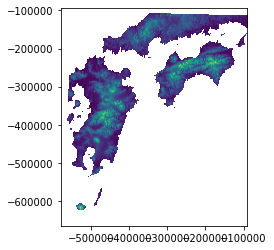

<AxesSubplot:>

In [52]:
f1 = rasterio.open("../data/seto_6674.tif")
show(f1)

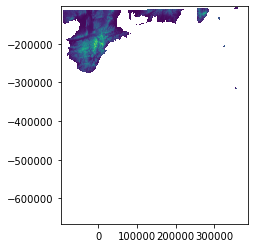

<AxesSubplot:>

In [54]:
f2 = rasterio.open("../data/osaka_6674.tif")
show(f2)

In [80]:
coasts = Overpass.request(bounds=(130.518, 32.266, 135.67, 34.8), natural="coastline")

INFO:root:bounds called with geom=True
INFO:root:nwr called with geom=True
INFO:root:Sending POST request to http://www.overpass-api.de/api/interpreter with {'data': '[out:json][timeout:180][bbox:32.266,130.518,34.8,135.67];nwr[natural=coastline];out geom;'}
INFO:root:Writing cache file /Users/xo/Library/Caches/cartes/osm/b77cff965f7cd9a595412b5a05996d7b.json


In [81]:
islands = Overpass.request(bounds=(130.518, 32.266, 135.67, 34.8), place="island")

INFO:root:bounds called with geom=True
INFO:root:nwr called with geom=True
INFO:root:Sending POST request to http://www.overpass-api.de/api/interpreter with {'data': '[out:json][timeout:180][bbox:32.266,130.518,34.8,135.67];nwr[place=island];out geom;'}
INFO:root:Writing cache file /Users/xo/Library/Caches/cartes/osm/99d65ec142a7286b96c7de63886142a2.json


In [59]:
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list("mycmap", ["#fffcfb", "#70615a"])

In [58]:
%load_ext lab_black

In [ ]:
import matplotlib.pyplot as plt
from cartes import crs
from cartes.utils import features


class Custom(crs.EPSG_6674):
    bbox = {
        "east_longitude": 151,
        "north_latitude": 47,
        "south_latitude": 25,
        "west_longitude": 124,
    }


fig, ax = plt.subplots(figsize=(15, 6), subplot_kw=dict(projection=Custom()))

ax.set_extent((130.518, 135.670, 33.266, 34.8))

# ax.add_feature(features.countries())
coasts.plot(ax, color="#bab0ac", linewidth=0.7)
show(f1, ax=ax, cmap=cmap)
show(f2, ax=ax, cmap=cmap)

ax.spines["geo"].set_visible(False)

for id_ in [4730658, 4671549, 8095804, 4830304, 5249833]: #, 4830303, 4830306]:
    place = islands[id_]
    ax.text(
        place.longitude,
        place.latitude,
        place.name,
        transform=crs.PlateCarree(),
        font="Hiragino Sans",
        size=16,
        color="#70615a",
        ha="center",
        va="top",
    )

for city in [
    "Hiroshima city",
    "Osaka city",
    "Kobe city",
    "Okayama city",
    "Tokushima city",
    "Matsuyama city",
    "Takamatsu city",
    "Shimonoseki city",
    "Oita city",
    "Kitakyushu city",
]:
    c = Nominatim.search(city)
    ax.text(
        float(c.lon),
        float(c.lat),
        c.city,
        transform=crs.PlateCarree(),
        font="Hiragino Sans",
        size=16,
        color="#70615a",
        ha="center",
        va="top",
    )

fig.set_tight_layout(True)
fig.savefig("../contributions/challenge_day19.png", dpi=300, facecolor="white")